In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

In [4]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0

    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image

    return train_flat, test_flat

train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

C:\Users\mcinf\AppData\Local\Temp\ipykernel_10108\1608563549.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
C:\Users\mcinf\AppData\Local\Temp\ipykernel_10108\1608563549.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_flat = test_X.reshape(test_X.shap

In [6]:
X = np.array([[1,-2,3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

-1.1737956936023635 [[ 1.22936831 -0.          0.1895162 ]
 [ 0.         -1.45478885 -0.62134896]]
Gradient check passed!


In [7]:

# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

0.0029249077787425726 [[ 2.90749422e-03 -3.15925345e-04 -5.64967080e-04]
 [-5.08449575e-05  4.04869539e-04  3.34346496e-04]]
Gradient check passed!
-0.019303456106255702 [[-1.49014811  1.63962978  2.12666763  0.04724531]
 [ 2.98029621 -3.27925955 -4.25333525 -0.09449062]
 [-2.75190231  0.65138254  2.28481892 -1.22253154]]
Gradient check passed!
-0.002976026527402608 [[-0.77172872  0.24057016  1.41089101 -2.10346396]]
Gradient check passed!


In [8]:
# TODO: In model.py, implement compute_loss_and_gradients function
print(train_X[:2])
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])

# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:2], train_y[:2])

[[-0.08975373 -0.03568431  0.08994824 ... -0.12654745 -0.03998549
   0.09710392]
 [ 0.01612863  0.01921765  0.05465412 ... -0.15007686 -0.13410314
  -0.10681765]]
Checking gradient for W-1
2.302027550823157 [[ 4.48889726e-06  0.00000000e+00 -6.65795372e-05]
 [ 5.34862892e-06  0.00000000e+00 -1.48909776e-05]
 [ 1.52112583e-05  0.00000000e+00  1.30764118e-04]
 ...
 [-4.17691846e-05  0.00000000e+00 -2.50151506e-04]
 [-3.73233995e-05  0.00000000e+00 -1.57428204e-04]
 [-2.97293396e-05  0.00000000e+00 -8.78353985e-06]]
Gradient check passed!
Checking gradient for B-1
2.302027550910993 [[0.00027832 0.         0.0018086 ]]
Gradient check passed!
Checking gradient for W-2
2.3020275328249777 [[ 0.0002407   0.00024035  0.00024043  0.00024104  0.00024038  0.00024061
   0.00024037  0.00024081  0.00024072 -0.00216541]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.00081744  0.00081623  0.00081652  0.00081858  0.00081635  0.00

True

In [9]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e-1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for W-1
2.3050168504011164 [[ 1.88649329e-04 -8.89585915e-05  2.15605390e-04]
 [ 2.83062197e-04  5.21034425e-05 -2.20418040e-04]
 [-2.03385689e-04  1.30477681e-04 -2.18999784e-04]
 ...
 [ 1.64485914e-04  5.07959975e-05  1.01886974e-04]
 [-1.18074476e-04 -2.72027400e-05  8.64267082e-05]
 [ 7.44988344e-05  2.93545609e-04 -3.78192354e-05]]
Gradient check passed!
Checking gradient for B-1
2.305016850789309 [[0.00042477 0.00109785 0.00020969]]
Gradient check passed!
Checking gradient for W-2
2.305016848702383 [[ 0.00033529  0.00062775  0.00068791  0.00036886  0.00046918  0.00029092
   0.00058789  0.00020459  0.00037187 -0.00503824]
 [ 0.00116129  0.00102628  0.00117582  0.00072891  0.00094029  0.0012541
   0.00086609  0.0013001   0.00106641 -0.01003051]
 [ 0.00027033  0.0004672   0.00086421  0.00096868  0.00015827  0.0005597
   0.00075849  0.00017589  0.00030051 -0.00376754]]
Gradient check passed!
Checking gradient for B-2
2.305016886387797 [[ 0.09999464  0.09956762  0.10

True

In [11]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30])

1  out of  30


0.03333333333333333

In [13]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD())

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down and train and val accuracy go up for every epoch
loss_history, train_history, val_history = trainer.fit()

1770  out of  9000
206  out of  1000
Loss: 2.327530, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.317088, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.308798, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.302204, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.296952, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.292764, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.289414, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.286729, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.284576, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.282844, Train accuracy: 0.196667, val

ValueError: too many values to unpack (expected 3)

In [15]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

1770  out of  9000
206  out of  1000
Loss: 2.327489, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.317092, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.308898, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.302423, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.297280, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.293188, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.289919, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.287287, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.285163, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.283449, Train accuracy: 0.196667, val

ValueError: too many values to unpack (expected 3)

In [17]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-1, learning_rate_decay=0.97)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

1334  out of  9000
140  out of  1000
Loss: 2.305298, Train accuracy: 0.148222, val accuracy: 0.140000
1770  out of  9000
206  out of  1000
Loss: 2.303831, Train accuracy: 0.196667, val accuracy: 0.206000
1574  out of  9000
186  out of  1000
Loss: 2.309004, Train accuracy: 0.174889, val accuracy: 0.186000
1770  out of  9000
206  out of  1000
Loss: 2.300443, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.298302, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.295226, Train accuracy: 0.196667, val accuracy: 0.206000
1670  out of  9000
198  out of  1000
Loss: 2.298655, Train accuracy: 0.185556, val accuracy: 0.198000
1770  out of  9000
206  out of  1000
Loss: 2.295270, Train accuracy: 0.196667, val accuracy: 0.206000
1770  out of  9000
206  out of  1000
Loss: 2.293136, Train accuracy: 0.196667, val accuracy: 0.206000
1590  out of  9000
179  out of  1000
Loss: 2.291984, Train accuracy: 0.176667, val

ValueError: too many values to unpack (expected 3)

In [18]:
data_size = 15
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-1, num_epochs=150, batch_size=5)

# You should expect this to reach 1.0 training accuracy
loss_history, train_history, val_history, learning_rate_history = trainer.fit()

3  out of  15
1  out of  15
Loss: 2.338733, Train accuracy: 0.200000, val accuracy: 0.066667
3  out of  15
1  out of  15
Loss: 2.296657, Train accuracy: 0.200000, val accuracy: 0.066667
3  out of  15
1  out of  15
Loss: 2.273749, Train accuracy: 0.200000, val accuracy: 0.066667
4  out of  15
1  out of  15
Loss: 2.223670, Train accuracy: 0.266667, val accuracy: 0.066667
5  out of  15
1  out of  15
Loss: 2.071414, Train accuracy: 0.333333, val accuracy: 0.066667
5  out of  15
0  out of  15
Loss: 1.935100, Train accuracy: 0.333333, val accuracy: 0.000000
5  out of  15
2  out of  15
Loss: 2.070659, Train accuracy: 0.333333, val accuracy: 0.133333
5  out of  15
1  out of  15
Loss: 1.850114, Train accuracy: 0.333333, val accuracy: 0.066667
7  out of  15
0  out of  15
Loss: 1.953887, Train accuracy: 0.466667, val accuracy: 0.000000
7  out of  15
0  out of  15
Loss: 1.774789, Train accuracy: 0.466667, val accuracy: 0.000000
9  out of  15
1  out of  15
Loss: 1.700916, Train accuracy: 0.600000, 

C:\PyCharm\dlcourse_ai\assignments\assignment2\layers.py:54: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-1*np.log(probs[range(m), target_index]))/m


6  out of  15
0  out of  15
Loss: inf, Train accuracy: 0.400000, val accuracy: 0.000000
11  out of  15
1  out of  15
Loss: inf, Train accuracy: 0.733333, val accuracy: 0.066667
5  out of  15
1  out of  15
Loss: 411.268348, Train accuracy: 0.333333, val accuracy: 0.066667
8  out of  15
0  out of  15
Loss: 591.498183, Train accuracy: 0.533333, val accuracy: 0.000000
5  out of  15
1  out of  15
Loss: inf, Train accuracy: 0.333333, val accuracy: 0.066667
8  out of  15
0  out of  15
Loss: inf, Train accuracy: 0.533333, val accuracy: 0.000000
8  out of  15
2  out of  15
Loss: inf, Train accuracy: 0.533333, val accuracy: 0.133333
7  out of  15
1  out of  15
Loss: inf, Train accuracy: 0.466667, val accuracy: 0.066667
7  out of  15
2  out of  15
Loss: inf, Train accuracy: 0.466667, val accuracy: 0.133333
4  out of  15
2  out of  15
Loss: inf, Train accuracy: 0.266667, val accuracy: 0.133333
9  out of  15
1  out of  15
Loss: inf, Train accuracy: 0.600000, val accuracy: 0.066667
6  out of  15
2  

In [19]:
def keywithmaxval(d):
     """ a) create a list of the dict's keys and values;
         b) return the key with the max value"""
     v=list(d.values())
     k=list(d.keys())
     return k[v.index(max(v))]

In [20]:
# Now, tweak some hyper parameters and make it train to 1.0 accuracy in 20 epochs or less

learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
reg_strengths = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
l_r_to_accuracy = {}

for l in learning_rates:
    for r in reg_strengths:

        model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 110, reg = r)
        # TODO: Change any hyperparamers or optimizators to reach training accuracy in 20 epochs
        dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
        trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=l, learning_rate_decay=0.97, num_epochs=20, batch_size=5)
        loss_history, train_history, val_history, learning_rate_history = trainer.fit()
        l_r_to_accuracy[str(l) + ', ' + str(r)] = np.average(train_history)
        print("Neural Network with l = %e, r = %e" % (l, r))
        print("Accuracy on training set: %4.2f" % (l_r_to_accuracy[str(l) + ', ' + str(r)]))
        #plt.plot(train_history)
        #plt.plot(val_history)

key_of_best = keywithmaxval(l_r_to_accuracy)
print(keywithmaxval(l_r_to_accuracy), ' accuracy is ', (l_r_to_accuracy[key_of_best]))

3  out of  15
1  out of  15
Loss: 2.339194, Train accuracy: 0.200000, val accuracy: 0.066667
3  out of  15
1  out of  15
Loss: 2.303541, Train accuracy: 0.200000, val accuracy: 0.066667
3  out of  15
2  out of  15
Loss: 2.265690, Train accuracy: 0.200000, val accuracy: 0.133333
5  out of  15
2  out of  15
Loss: 2.217252, Train accuracy: 0.333333, val accuracy: 0.133333
6  out of  15
0  out of  15
Loss: 2.081981, Train accuracy: 0.400000, val accuracy: 0.000000
5  out of  15
0  out of  15
Loss: 1.954158, Train accuracy: 0.333333, val accuracy: 0.000000
4  out of  15
2  out of  15
Loss: 1.813249, Train accuracy: 0.266667, val accuracy: 0.133333
7  out of  15
0  out of  15
Loss: 2.044973, Train accuracy: 0.466667, val accuracy: 0.000000
9  out of  15
1  out of  15
Loss: 1.813416, Train accuracy: 0.600000, val accuracy: 0.066667
8  out of  15
1  out of  15
Loss: 1.802607, Train accuracy: 0.533333, val accuracy: 0.066667
7  out of  15
1  out of  15
Loss: 1.693363, Train accuracy: 0.466667, 

In [21]:
# Let's train the best one-hidden-layer network we can

learning_rates = 1e-4
reg_strength = 1e-3
learning_rate_decay = 0.999
hidden_layer_size = 128
num_epochs = 200
batch_size = 64
learning_rate_history = []
#reg = 0.01
#learning_rate=0.1

'''
BEST OF THE BEST RECOMMENDED FOR EVERY DATA SCIENTIST!!!
best_classifier = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 110, reg = 1e-6)
dataset = Dataset(train_X, train_y, val_X, val_y)
best_trainer = Trainer(best_classifier, dataset, MomentumSGD(), learning_rate=1e-1, learning_rate_decay=0.97, num_epochs=50, batch_size=64)
loss_history, train_history, val_history, learning_rate_history = best_trainer.fit()
'''

best_classifier = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 110, reg = 1e-6)
dataset = Dataset(train_X, train_y, val_X, val_y)
best_trainer = Trainer(best_classifier, dataset, MomentumSGD(), learning_rate=1e-1, learning_rate_decay=0.97, num_epochs=50, batch_size=64)
loss_history, train_history, val_history, learning_rate_history = best_trainer.fit()

best_val_accuracy = np.average(val_history)

# TODO find the best hyperparameters to train the network
# Don't hesitate to add new values to the arrays above, perform experiments, use any tricks you want
# You should expect to get to at least 40% of valudation accuracy
# Save loss/train/history of the best classifier to the variables above

print('best validation accuracy achieved: %f' % best_val_accuracy)

2991  out of  9000
333  out of  1000
Loss: 2.153284, Train accuracy: 0.332333, val accuracy: 0.333000
3937  out of  9000
428  out of  1000
Loss: 1.752944, Train accuracy: 0.437444, val accuracy: 0.428000
5248  out of  9000
566  out of  1000
Loss: 1.455437, Train accuracy: 0.583111, val accuracy: 0.566000
5643  out of  9000
606  out of  1000
Loss: 1.227753, Train accuracy: 0.627000, val accuracy: 0.606000
6072  out of  9000
621  out of  1000
Loss: 1.202390, Train accuracy: 0.674667, val accuracy: 0.621000
6300  out of  9000
637  out of  1000
Loss: 1.081402, Train accuracy: 0.700000, val accuracy: 0.637000
6354  out of  9000
649  out of  1000
Loss: 0.980473, Train accuracy: 0.706000, val accuracy: 0.649000
6616  out of  9000
680  out of  1000
Loss: 0.927734, Train accuracy: 0.735111, val accuracy: 0.680000
6868  out of  9000
685  out of  1000
Loss: 0.882807, Train accuracy: 0.763111, val accuracy: 0.685000
7074  out of  9000
702  out of  1000
Loss: 0.828554, Train accuracy: 0.786000, val

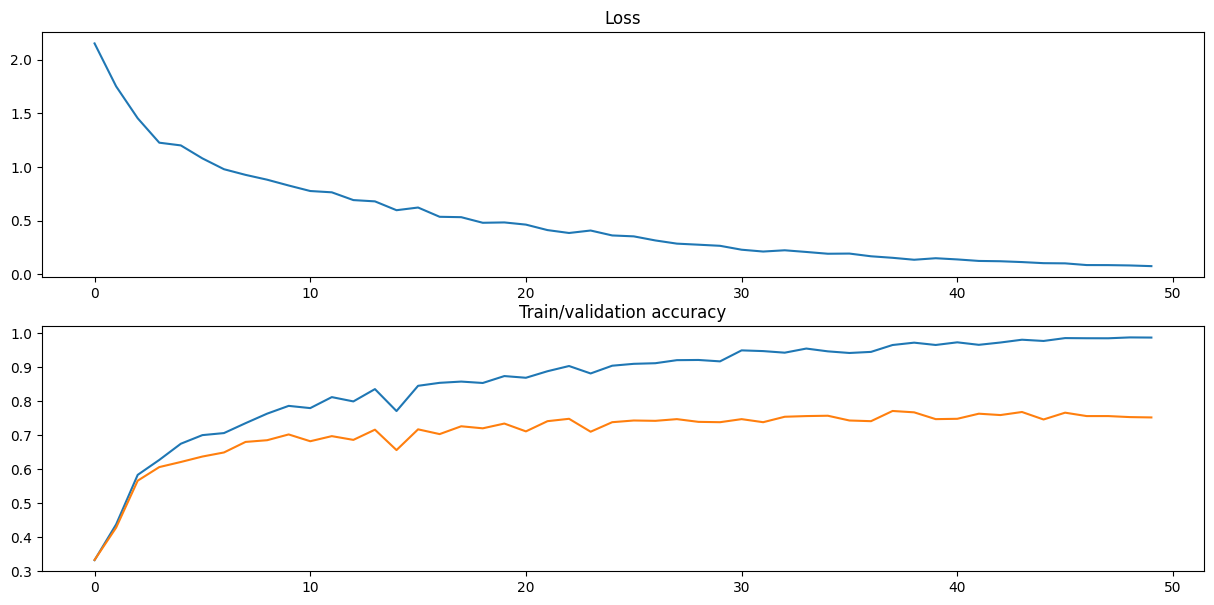

In [22]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

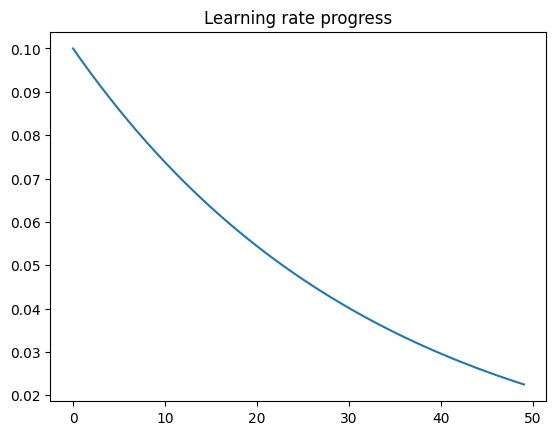

In [23]:
plt.title("Learning rate progress")
plt.plot(learning_rate_history)

In [24]:
test_pred = best_classifier.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

732  out of  1000
Neural net test set accuracy: 0.732000
